In [0]:
import pandas as pd
import numpy as np
import pypfopt
from pypfopt.efficient_frontier import EfficientFrontier
import matplotlib.pyplot as plt

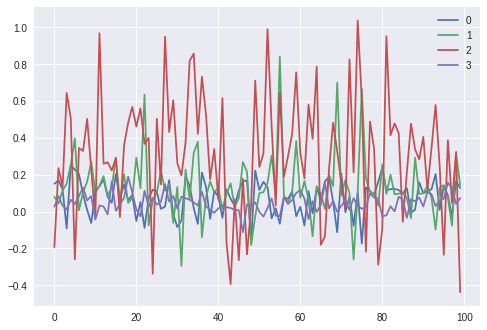

In [2]:
# generate data
rdata = np.random.randn(100, 4)

data = pd.DataFrame()
data[0] = rdata[:, 0]*0.1 + 0.1
data[1] = rdata[:, 0]*rdata[:, 1]*0.2 + 0.1
data[2] = rdata[:, 2]*0.3 + 0.3
data[3] = 0.05 + rdata[:, 3]*0.05
data.plot()

In [3]:
print(data.mean(),data.cov(), sep='\n')

0    0.078125
1    0.134582
2    0.309666
3    0.046688
dtype: float64
          0         1         2         3
0  0.008641 -0.003094 -0.003484 -0.000324
1 -0.003094  0.028540  0.004331 -0.001681
2 -0.003484  0.004331  0.106837  0.000340
3 -0.000324 -0.001681  0.000340  0.002455


In [0]:
def markovitz(data, target_return):
  ef = EfficientFrontier(data.mean(), data.cov(), weight_bounds=(-1, 1))
  proportions = ef.efficient_return(target_return)
  mean, std, sharpe = ef.portfolio_performance(risk_free_rate=0, verbose=False)
  return proportions, mean, std

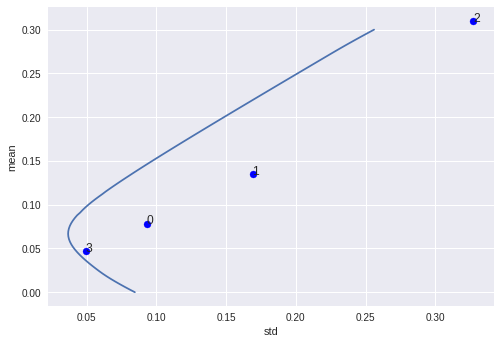

In [5]:
# target profits
x = np.linspace(0, 0.3, 100)

# instruments solo
for col in data:
  m, s = data[col].mean(), data[col].std() 
  plt.scatter(s, m, color='blue')
  plt.annotate(col, (s, m))
  
# optimize portfolios
results = [markovitz(data, x_) for x_ in x] 

# plot frontier
means = [z[1] for z in results]
stds = [z[2] for z in results]
plt.plot(stds, means)
plt.xlabel('std')
plt.ylabel('mean')
pass